## Análise de Expansão de Laboratórios por ZCTA

Nesta etapa, o objetivo foi compreender os padrões associados às regiões onde a empresa já instalou seus laboratórios, com o intuito de identificar **novos locais com alto potencial de desempenho**. A análise foi conduzida a partir das **ZCTAs disponíveis**, relacionando essas áreas a características econômicas e demográficas. O foco esteve em reconhecer elementos recorrentes nas regiões de boa performance, de modo a induzir padrões que justifiquem recomendações de expansão.

Para direcionar a análise, foram formuladas quatro hipóteses:

- ZCTAs com maior população tendem a gerar mais receita por conta da maior demanda potencial.
- Faixas etárias mais idosas (60+) contribuem para maior receita, por realizarem mais exames e exames mais caros.
- Faixas de renda domiciliar mais altas aumentam a propensão à realização de exames, inclusive os de maior valor.
- Regiões com maior número de laboratórios apresentam maior receita.

---

### Resultados da Análise

**Correlação entre receita, população e exames:**

- Verificou-se uma correlação forte entre a receita total e a quantidade de exames realizados.
- Ambas as variáveis também mostraram correlação significativa com a população total das ZCTAs, indicando que áreas mais populosas concentram maior demanda e, consequentemente, maior geração de receita.

**Perfil econômico das ZCTAs de maior receita:**

- As faixas de renda domiciliar entre \$35.000 e \$149.999 apresentaram a maior correlação com receita e volume de exames.
- Essa tendência foi reforçada pela análise das 10 ZCTAs com maior receita, nas quais essas faixas de renda dominaram, indicando um perfil econômico relevante.

**Perfil demográfico das regiões de destaque:**

- As faixas etárias entre 25 e 54 anos foram as mais prevalentes entre as ZCTAs com melhor desempenho financeiro.
- Ao contrário da hipótese inicial, a população com 60 anos ou mais não se destacou nessas regiões.

**Distribuição dos laboratórios existentes:**

- ZCTAs com três laboratórios apresentaram maior mediana de receita em boxplots, mas essa observação se baseia em apenas duas ZCTAs, o que limita sua validade estatística.
- Das 10 ZCTAs com maior receita, todas possuíam apenas um laboratório, e os dois primeiros colocados geravam quase três vezes mais receita do que as ZCTAs com dois ou três laboratórios.
- Isso sugere que a presença de múltiplos laboratórios em uma mesma ZCTA não é um fator determinante de desempenho superior. A empresa pode, inclusive, evitar expandir em regiões já atendidas, visando reduzir sobreposição de oferta e custos operacionais.

---

### Conclusão e Recomendação

Com base nos achados, foi aplicada uma abordagem quantitativa para ranqueamento das ZCTAs utilizando a transformação em percentis e pegando a média dos indicadores-chave. Foram considerados três indicadores-chave: **população total**, **% de pessoas em faixas etárias entre 25 e 54 anos**, e **% de pessoas em faixas de renda entre \$35.000 e \$149.999**. Com base nessa análise técnica, as **três ZCTAs mais indicadas para expansão** de laboratórios, por apresentarem simultaneamente alta população, bom perfil etário e elevada presença de faixas de renda especificadas foram:

- **28273**
- **75067**
- **37128**

Essas regiões se destacam como as mais promissoras para instalação de novos laboratórios, considerando critérios demográficos e socioeconômicos alinhados com o perfil das localidades de melhor desempenho já atendidas pela empresa.

### 1. Preparação e limpeza dos dados

In [31]:
# Para importação e manipulação de dados
import pandas as pd

# Para cálculos matemáticos e estatísticos
import numpy as np

# Para construção de gráficos
import plotly.graph_objects as go
import plotly.subplots as sp

# Para não aparecer mensagens de aviso
import warnings
warnings.filterwarnings(action='ignore')

# Para escolha das ZCTAs de expansão
from sklearn.preprocessing import QuantileTransformer

# Para mostrar todas as colunas
pd.set_option('display.max_columns', None)

In [ ]:
# Função para remover ids inválidos que comecem com "-"
def remover_ids_invalidos(df, coluna_id):
    ids_invalidos = df[df[coluna_id].apply(lambda k: k.startswith('-'))].index
    df.drop(ids_invalidos, inplace=True)

    return df

In [33]:
# Lendo o dataset de volume de exames
registros_exames = pd.read_csv('C:/Users/USER/Documents/GitHub/desafio-EloGroup/data/transactional_data (1).csv', sep=';')

# Transformando as colunas de data para datetime para criar a idade do paciente
registros_exames['Date of birth'] = pd.to_datetime(registros_exames['Date of birth'], dayfirst=True)
registros_exames['Date of service'] = pd.to_datetime(registros_exames['Date of service'])

registros_exames.insert(2, 'Age', registros_exames['Date of service'].dt.year - registros_exames['Date of birth'].dt.year)

# Removendo a coluna de Custo do teste pois está errada e não pertence à essa tabela
registros_exames.drop('Testing Cost', inplace=True, axis=1)

# Removendo duplicatas
registros_exames.drop_duplicates(inplace=True)

# Removendo id inválido
remover_ids_invalidos(registros_exames, 'Patient Id')

# Resetando o index
registros_exames.reset_index(drop=True, inplace=True)

registros_exames

,Patient Id,Gender,Age,Date of birth,Date of service,Service Id,Lab Id,CodItem
0,10210830256-BIO003,F,43.0,1976-08-01,2019-01-07,571904533475-38,L133,70003237
1,10210830256-BIO003,F,43.0,1976-08-01,2019-01-07,571904533475-38,L133,70000638
2,10210830256-BIO003,F,43.0,1976-08-01,2019-01-07,571904533475-38,L133,70001597
3,10210830256-BIO003,F,43.0,1976-08-01,2019-01-07,571904533475-38,L133,70000103
4,10210830256-BIO003,F,43.0,1976-08-01,2019-01-07,571904533475-38,L133,70000224
...,...,...,...,...,...,...,...,...
2340708,7664157546-1,M,50.0,1971-03-06,2021-02-12,7664157546-1-1,L697,70004038
2340709,7664157546-1,M,50.0,1971-03-06,2021-02-12,7664157546-1-1,L697,70004134
2340710,7664157546-1,M,50.0,1971-03-06,2021-02-12,7664157546-1-1,L697,70003056
2340711,7664157546-1,M,50.0,1971-03-06,2021-02-12,7664157546-1-1,L697,70004185


In [34]:
# Lendo o dataset de tipo de exames
tipo_exames = pd.read_csv('C:/Users/USER/Documents/GitHub/desafio-EloGroup/data/exams_data.csv')

# Removendo duplicatas
tipo_exames.drop_duplicates(subset='CodItem', inplace=True)

# Resetando o index
tipo_exames.reset_index(drop=True, inplace=True)

tipo_exames

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02
...,...,...,...,...,...,...
1996,70008635,"GENES BRCA1 E BRCA2, MLPA, SANGUE",CA,GENETICS,SPECIAL GENETICS,159.91
1997,70005303,"OBSTETRICA 1§ TRIMESTRE (ENDOVAGINAL), SEGUNDO...",RID,ULTRASOUND,FETAL MEDICINE,111.43
1998,70006441,"HEMOFILIA A, ANALISE DO DNA, SEQUENCIAMENTO, S...",CA,GENETICS,SPECIAL GENETICS,27.03
1999,70004141,"INSULINA, SORO, 90 MIN APOS XXX",CA,CORELAB,IMMUNOHORMONE,5.55


In [35]:
# Lendo o dataset de laboratórios
laboratorios = pd.read_csv('C:/Users/USER/Documents/GitHub/desafio-EloGroup/data/df_geocode (1).csv', index_col=0)

# Removendo duplicatas
laboratorios.drop_duplicates(subset='Lab Id', inplace=True)

# Removendo id inválido
remover_ids_invalidos(laboratorios, 'Lab Id')

# Resetando o index
laboratorios.reset_index(drop=True, inplace=True)

# Transformando a coluna Zipcode de float para int para remover o valor decimal
laboratorios['Zipcode'] = (laboratorios['Zipcode'].astype(int))

# Transformando a coluna Zipcode inteira para string e adicionando zerar à esquerda para completar 5 dígitos
laboratorios['Zipcode'] = laboratorios['Zipcode'].astype(str).apply(lambda k: k.zfill(5))

laboratorios

,Lab Id,Address,Location,Zipcode
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469
...,...,...,...,...
113,L886,"1819 MARLTON PIKE W., CHERRY HILL, NJ 08002","39.9184081,-75.035649",08002
114,L535,"603 SENECA ST 4, ONEIDA, NY 13421","43.0773695,-75.6536905",13421
115,L723,"8052 STATE ROUTE 12, BARNEVELD, NY 13304","43.2530101,-75.1860015",13304
116,L163,"3906 LILLIE AVE STE 3, DAVENPORT, IA 52806","41.5611182,-90.5915183",52806


In [36]:
# Lendo os dados econômicos relevantes a nível de ZCTAs 
dados_economicos_zcta = pd.read_csv('C:/Users/USER/Documents/GitHub/desafio-EloGroup/data/EconomicData_ZCTAs (1).csv', index_col=0)

# Removendo duplicatas
dados_economicos_zcta.drop_duplicates(subset='id', inplace=True)

# Deixando a coluna do ZCTA apenas com seus 5 digitos
dados_economicos_zcta['Geographic Area Name'] = dados_economicos_zcta['Geographic Area Name'].apply(lambda k: k.split(' ')[-1])

dados_economicos_zcta

,id,Geographic Area Name,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,8600000US35004,35004,198,71,298,513,647,1117,529,945,245,61
1,8600000US35005,35005,188,184,318,293,353,562,299,407,67,26
2,8600000US35006,35006,71,20,117,104,154,176,124,194,51,7
3,8600000US35007,35007,396,208,670,462,1173,1854,1578,2224,473,254
4,8600000US35010,35010,700,610,1093,957,1056,1512,807,749,254,249
...,...,...,...,...,...,...,...,...,...,...,...,...
33115,8600000US00979,00979,735,471,1547,1374,957,1390,662,643,99,319
33116,8600000US00982,00982,1299,483,1184,848,1104,657,206,79,34,16
33117,8600000US00983,00983,2638,1368,2495,1845,1906,1952,511,363,110,96
33118,8600000US00985,00985,2426,1150,2266,1777,1873,1737,501,395,15,26


In [37]:
# Dados demográficos relevantes a nível de ZCTAs
dados_demograficos_zcta = pd.read_csv('C:/Users/USER/Documents/GitHub/desafio-EloGroup/data/DemographicData_ZCTAs.csv', index_col=0)

# Removendo duplicatas
dados_demograficos_zcta.drop_duplicates(subset='Id', inplace=True)

# Deixando a coluna do ZCTA apenas com seus 5 digitos
dados_demograficos_zcta['GeographicAreaName'] = dados_demograficos_zcta['GeographicAreaName'].apply(lambda k: k.split(' ')[-1])

dados_demograficos_zcta

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,8600000US35004,35004,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,8600000US35005,35005,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,8600000US35006,35006,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2
3,8600000US35007,35007,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7
4,8600000US35010,35010,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,8600000US00979,00979,16130,91.6,402,532,554,726,1005,1935,2109,2468,1368,1148,1974,1363,546,48.7
33116,8600000US00982,00982,14346,81.0,431,952,795,769,854,1975,1446,1769,957,948,1201,1654,595,44.8
33117,8600000US00983,00983,33947,81.4,1833,1589,1841,2203,2957,4809,3712,4081,1930,1574,4003,2405,1010,40.8
33118,8600000US00985,00985,31682,82.4,1171,1427,1833,2304,2032,3491,3966,4073,1732,2047,4207,2498,901,43.6


In [38]:
dados_total = registros_exames.merge(laboratorios[['Lab Id', 'Zipcode']], how='left')\
                                           .merge(tipo_exames[['CodItem', 'Testing Cost']], how='left')\
                                           .rename(columns={'Zipcode': 'ZCTA'})

dados_total

,Patient Id,Gender,Age,Date of birth,Date of service,Service Id,Lab Id,CodItem,ZCTA,Testing Cost
0,10210830256-BIO003,F,43.0,1976-08-01,2019-01-07,571904533475-38,L133,70003237,94565,1.78
1,10210830256-BIO003,F,43.0,1976-08-01,2019-01-07,571904533475-38,L133,70000638,94565,2.46
2,10210830256-BIO003,F,43.0,1976-08-01,2019-01-07,571904533475-38,L133,70001597,94565,2.11
3,10210830256-BIO003,F,43.0,1976-08-01,2019-01-07,571904533475-38,L133,70000103,94565,0.80
4,10210830256-BIO003,F,43.0,1976-08-01,2019-01-07,571904533475-38,L133,70000224,94565,1.02
...,...,...,...,...,...,...,...,...,...,...
2340708,7664157546-1,M,50.0,1971-03-06,2021-02-12,7664157546-1-1,L697,70004038,01950,1.37
2340709,7664157546-1,M,50.0,1971-03-06,2021-02-12,7664157546-1-1,L697,70004134,01950,0.95
2340710,7664157546-1,M,50.0,1971-03-06,2021-02-12,7664157546-1-1,L697,70003056,01950,1.12
2340711,7664157546-1,M,50.0,1971-03-06,2021-02-12,7664157546-1-1,L697,70004185,01950,2.39


#### Criação da tabela principal por ZCTA

In [39]:
colunas_dados_demograficos = list(dados_demograficos_zcta.drop(['Id', 'GeographicAreaName', 'SexRatio(males per 100 females)','MedianAgeInYears'], axis=1).columns)
colunas_dados_economicos = list(dados_economicos_zcta.drop(['id', 'Geographic Area Name'], axis=1).columns)

# Criando novo dataset com zctas disponíveis
dados_zctas_economicos_demograficos = dados_demograficos_zcta.merge(dados_economicos_zcta, how='left', left_on='Id', right_on='id')\
                                                             .drop(['Id', 'id', 'Geographic Area Name', 'SexRatio(males per 100 females)','MedianAgeInYears'], axis=1)\
                                                             .rename(columns={'GeographicAreaName': 'ZCTA'})

# Selecionando Zctas com população total 0 para ser removidas
total_population_zero = dados_zctas_economicos_demograficos[dados_zctas_economicos_demograficos['TotalPopulation'] == 0].index

dados_zctas_economicos_demograficos.drop(total_population_zero, inplace=True)
dados_zctas_economicos_demograficos.reset_index(drop=True, inplace=True)
dados_zctas_economicos_demograficos

,ZCTA,TotalPopulation,Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,35004,12045,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,198,71,298,513,647,1117,529,945,245,61
1,35005,7344,504,453,511,499,214,788,795,968,612,561,798,485,156,188,184,318,293,353,562,299,407,67,26
2,35006,2883,96,153,303,129,156,183,367,430,296,260,280,201,29,71,20,117,104,154,176,124,194,51,7
3,35007,26332,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,396,208,670,462,1173,1854,1578,2224,473,254
4,35010,20613,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,700,610,1093,957,1056,1512,807,749,254,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32771,00979,16130,402,532,554,726,1005,1935,2109,2468,1368,1148,1974,1363,546,735,471,1547,1374,957,1390,662,643,99,319
32772,00982,14346,431,952,795,769,854,1975,1446,1769,957,948,1201,1654,595,1299,483,1184,848,1104,657,206,79,34,16
32773,00983,33947,1833,1589,1841,2203,2957,4809,3712,4081,1930,1574,4003,2405,1010,2638,1368,2495,1845,1906,1952,511,363,110,96
32774,00985,31682,1171,1427,1833,2304,2032,3491,3966,4073,1732,2047,4207,2498,901,2426,1150,2266,1777,1873,1737,501,395,15,26


In [40]:
dados_total_zcta_agg = dados_total.groupby('ZCTA').agg(Qtd_Exames=('ZCTA', 'count'),
                                                       Idade_media_atendida=('Age', 'mean'), 
                                                       Receita_Total=('Testing Cost', 'sum'), 
                                                       Qtd_Laboratorios=('Lab Id', 'nunique'))\
                                                    .reset_index()\
                                                    .merge(dados_zctas_economicos_demograficos, how='left', on='ZCTA')

dados_total_zcta_agg

,ZCTA,Qtd_Exames,Idade_media_atendida,Receita_Total,Qtd_Laboratorios,TotalPopulation,Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,01605,12657,44.327566,36261.08,1,28533.0,1766.0,1814.0,2016.0,2042.0,2609.0,5117.0,3349.0,3052.0,1501.0,1404.0,1911.0,1128.0,824.0,1325.0,958.0,1576.0,835.0,1550.0,1654.0,1074.0,1080.0,304.0,317.0
1,01606,8407,41.614488,71014.40,1,19896.0,920.0,1348.0,1038.0,1343.0,1073.0,2907.0,2513.0,2675.0,1468.0,1474.0,1416.0,1085.0,636.0,366.0,305.0,799.0,641.0,1078.0,1367.0,1086.0,1478.0,605.0,434.0
2,01701,17993,40.491302,178318.70,1,32590.0,1468.0,1752.0,1703.0,1618.0,1485.0,3891.0,3946.0,5316.0,2105.0,2771.0,3909.0,1551.0,1075.0,439.0,370.0,363.0,733.0,949.0,1693.0,1396.0,2870.0,1738.0,2503.0
3,01702,20099,38.813125,65109.58,1,39799.0,2527.0,2246.0,2130.0,3164.0,2539.0,7388.0,6095.0,4478.0,2203.0,2230.0,2423.0,1567.0,809.0,992.0,648.0,1027.0,1217.0,1871.0,2761.0,2231.0,2275.0,1197.0,993.0
4,01840,33938,43.070039,437525.03,1,5573.0,437.0,406.0,380.0,282.0,474.0,775.0,717.0,662.0,383.0,299.0,463.0,175.0,120.0,434.0,268.0,479.0,215.0,250.0,246.0,154.0,120.0,36.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,98122,27948,42.412945,154106.69,1,39305.0,1069.0,1200.0,1269.0,2375.0,4976.0,12661.0,5750.0,4152.0,1318.0,1634.0,1688.0,748.0,465.0,1155.0,947.0,1148.0,1249.0,1867.0,2925.0,1865.0,3169.0,1770.0,3372.0
100,98133,38471,41.324452,613181.77,1,48650.0,2849.0,1735.0,1846.0,2165.0,2743.0,9049.0,6941.0,6520.0,3237.0,2838.0,4268.0,2580.0,1879.0,1124.0,1262.0,1759.0,1696.0,2266.0,3361.0,3198.0,3709.0,1532.0,1743.0
101,98148,10179,44.647117,35362.01,2,12149.0,916.0,923.0,739.0,622.0,649.0,2029.0,1661.0,1686.0,643.0,648.0,934.0,356.0,343.0,266.0,86.0,411.0,411.0,659.0,937.0,487.0,811.0,338.0,210.0
102,98370,14135,38.439052,47001.86,1,31278.0,1582.0,1785.0,2027.0,1944.0,1484.0,3363.0,4003.0,4060.0,2344.0,2550.0,3744.0,1811.0,581.0,449.0,249.0,748.0,604.0,1124.0,2132.0,1898.0,2726.0,1171.0,1292.0


### 2. Análise guiada pelas hipóteses

#### Análise de correlação entre dados dos laboratórios e dados econômicos/demográficos

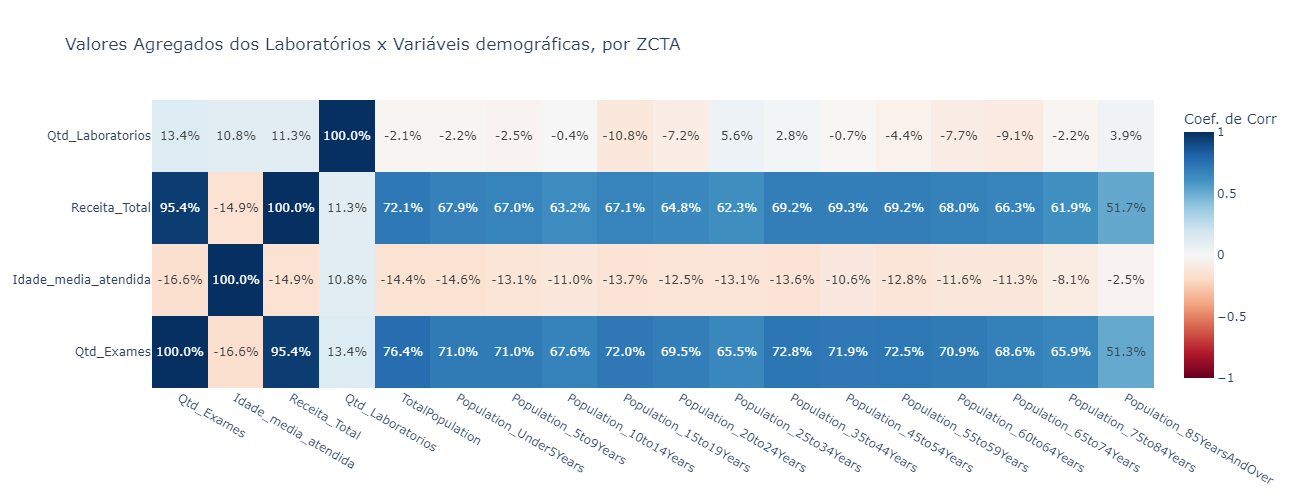

In [41]:
# Calculando a matriz de correlação
correlacao = dados_total_zcta_agg[['Qtd_Exames', 'Idade_media_atendida', 'Receita_Total', 'Qtd_Laboratorios'] + colunas_dados_demograficos].corr(method='spearman')

# Selecionando as 4 primeiras linhas
correlacao = correlacao.head(4)

# Convertendo para percentual
correlacao_percentual = correlacao * 100

# Formatando os textos a serem exibidos
text_values = np.round(correlacao_percentual.values, 1).astype(str) + '%'

# Criando o heatmap
fig = go.Figure(data=go.Heatmap(z=correlacao.values, x=correlacao.columns, y=correlacao.index, 
                                colorscale='RdBu',zmin=-1, zmax=1, text=text_values, texttemplate="%{text}", colorbar=dict(title='Coef. de Corr')))

fig.update_layout(title='Valores Agregados dos Laboratórios x Variáveis demográficas, por ZCTA', width=1300, height=500)

fig.show('png')

- Acima, podemos ver a correlação entre as variáveis agregadas dos laboratórios por ZCTA (Quantidade de Laboratórios, Receita Total, Idade Média dos Pacientes Atendidos e Quantidade Total de Exames), juntamente com as variáveis demográficas de população total e faixas etárias da população.

- Podemos observar que a Quantidade de Exames e a Receita Total têm uma forte correlação positiva, indicando que, à medida que aumentam os atendimentos em determinada ZCTA, também aumenta a receita.

- Devido a essa relação próxima entre Quantidade de Exames e Receita, percebe-se que essas variáveis também estão correlacionadas positivamente com a população em geral — embora não indiquem, de forma evidente, uma correlação específica com uma faixa etária em particular. Um fator importante a se considerar é a alta correlação positiva, principalmente da População Total com Quantidade de Exames (76.4%) e com a Receita Total (72.1%).

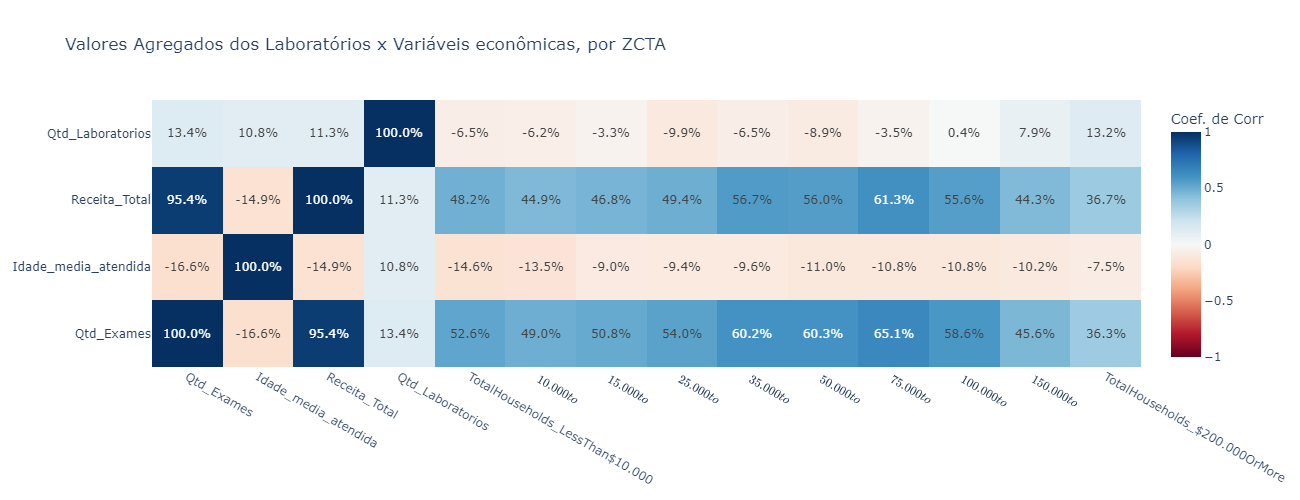

In [42]:
# Calculando a matriz de correlação
correlacao = dados_total_zcta_agg[['Qtd_Exames', 'Idade_media_atendida', 'Receita_Total', 'Qtd_Laboratorios'] + colunas_dados_economicos].corr(method='spearman')

# Selecionando as 4 primeiras linhas
correlacao = correlacao.head(4)

# Convertendo para percentual
correlacao_percentual = correlacao * 100

# Formatando os textos a serem exibidos
text_values = np.round(correlacao_percentual.values, 1).astype(str) + '%'

# Criando o heatmap
fig = go.Figure(data=go.Heatmap(z=correlacao.values, x=correlacao.columns, y=correlacao.index, 
                                colorscale='RdBu',zmin=-1, zmax=1, text=text_values, texttemplate="%{text}", colorbar=dict(title='Coef. de Corr')))

fig.update_layout(title='Valores Agregados dos Laboratórios x Variáveis econômicas, por ZCTA', width=1300, height=500)

fig.show('png')

- Acima, podemos ver a correlação entre as variáveis agregadas dos laboratórios por ZCTA (Quantidade de Laboratórios, Receita Total, Idade Média dos Pacientes Atendidos e Quantidade Total de Exames), juntamente com as variáveis econômicas de população total e faixas etárias da população.

- Como vimos antes, a Quantidade de Exames e Receita total tem uma forte correlação. Além disso, nota-se que a população com uma maior correlação entre essas variáveis está com faixas de renda entre 35 mil a 149.999, o que configura como uma população de classe média que tem maior presença para realizar exames nos laboratórios.

- Curiosamente, isso refuta a hipótese de que residências com maior renda presenciam mais os laboratórios dessa empresa para realizar os exames. Sugere-se que vão para outros laboratórios fazer exames e isso seria uma questão importante para ser avaliado com informações sobre os outros laboratórios.

#### Análise da Performance das ZCTAs para obter insights (Métrica: Receita Total)

In [43]:
dados_total_zcta_agg.sort_values(by='Receita_Total', ascending=False).head(10)

,ZCTA,Qtd_Exames,Idade_media_atendida,Receita_Total,Qtd_Laboratorios,TotalPopulation,Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
88,95823,93495,45.538874,3583193.40,1,79440.0,6565.0,6963.0,6171.0,5412.0,5570.0,13578.0,9398.0,8329.0,4965.0,4165.0,5384.0,1904.0,1036.0,1879.0,1363.0,2576.0,3099.0,3493.0,4716.0,2575.0,2870.0,587.0,552.0
82,94565,121884,43.271315,3541236.20,1,97671.0,7092.0,7253.0,6839.0,6074.0,7864.0,14987.0,14341.0,12697.0,5731.0,4888.0,6524.0,2598.0,783.0,1248.0,1298.0,1707.0,2074.0,3224.0,5188.0,4567.0,4846.0,2219.0,1997.0
52,30096,95256,43.323238,2494560.55,1,68691.0,4335.0,4376.0,4749.0,4130.0,4874.0,11188.0,9629.0,10248.0,4386.0,3492.0,4636.0,1988.0,660.0,1277.0,1020.0,2214.0,2771.0,3809.0,5563.0,3485.0,3025.0,1233.0,1428.0
90,98008,88429,42.374854,2304453.44,1,25719.0,1376.0,1761.0,1502.0,1350.0,1100.0,3147.0,3673.0,4037.0,1851.0,1405.0,2561.0,1068.0,888.0,312.0,159.0,262.0,387.0,741.0,1115.0,1020.0,1592.0,1224.0,2466.0
40,19143,68469,43.377499,2220290.57,1,64630.0,4781.0,4058.0,4619.0,3366.0,4906.0,12321.0,7904.0,6854.0,3353.0,3544.0,4930.0,2538.0,1456.0,3665.0,2426.0,3441.0,3131.0,3500.0,3824.0,2405.0,1647.0,529.0,534.0
91,98012,69625,40.401106,1835386.30,1,67427.0,5132.0,5212.0,4667.0,3536.0,3821.0,10739.0,11182.0,9203.0,3792.0,2980.0,4558.0,1794.0,811.0,416.0,406.0,722.0,933.0,1740.0,3156.0,3517.0,5644.0,4145.0,3567.0
77,94513,58878,40.729865,1799137.34,1,64313.0,3003.0,4485.0,5543.0,5413.0,3744.0,6191.0,7987.0,9462.0,4785.0,3770.0,5374.0,3126.0,1430.0,551.0,374.0,1018.0,954.0,1784.0,2170.0,2471.0,4602.0,3137.0,3629.0
53,30135,73354,41.940794,1784516.79,1,67710.0,4010.0,4496.0,5933.0,4956.0,4055.0,7740.0,9294.0,10592.0,3992.0,3916.0,5779.0,2207.0,740.0,905.0,623.0,1566.0,1416.0,2149.0,4336.0,3762.0,4690.0,1910.0,1055.0
89,98004,64473,42.087618,1304553.98,2,36202.0,1692.0,1450.0,1958.0,1343.0,1836.0,8340.0,5246.0,5095.0,2201.0,1753.0,2597.0,1762.0,929.0,629.0,285.0,517.0,468.0,879.0,1499.0,1744.0,3324.0,2146.0,5579.0
94,98034,76187,41.864281,1295589.00,3,43471.0,2813.0,2485.0,2426.0,1846.0,2392.0,8207.0,6852.0,5702.0,2235.0,2712.0,3682.0,1496.0,623.0,672.0,305.0,629.0,760.0,1474.0,2226.0,2609.0,3797.0,2317.0,2857.0


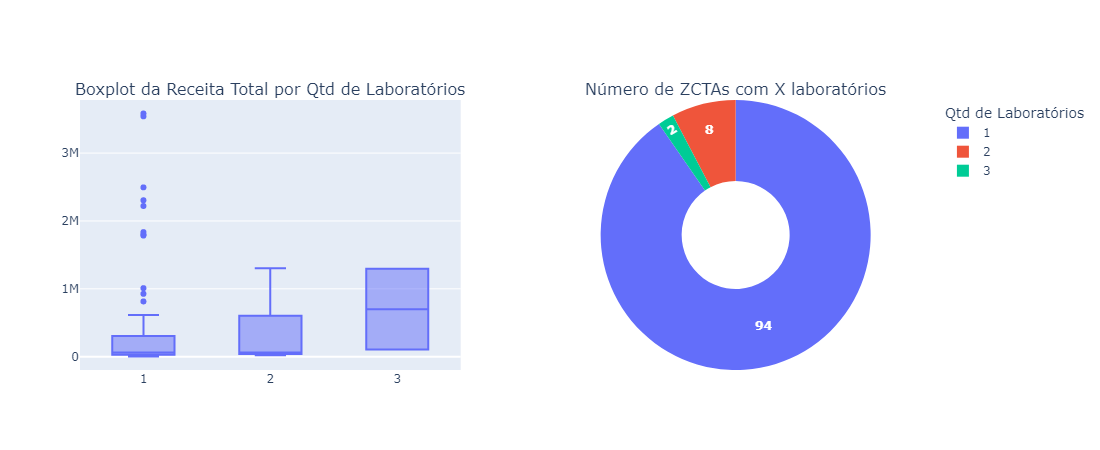

In [44]:
# Agrupamento de quantidade de laboratórios
qtd_labs = dados_total_zcta_agg['Qtd_Laboratorios'].value_counts()

# Criando os subplots
fig = sp.make_subplots(rows=1, cols=2, 
                       subplot_titles=['Boxplot da Receita Total por Qtd de Laboratórios', 'Número de ZCTAs com X laboratórios'],specs=[[{"type": "xy"}, {"type": "domain"}]])

# Boxplots
fig.add_trace(go.Box(x=dados_total_zcta_agg['Qtd_Laboratorios'], y=dados_total_zcta_agg['Receita_Total'], showlegend=False),row=1, col=1)

# Gráfico de pizza
fig.add_trace(go.Pie(labels=qtd_labs.index.astype(str), values=qtd_labs.values, textinfo='value',textfont=dict(color='white', weight='bold'), 
                     hole=0.4, showlegend=True,), row=1, col=2)

# Atualização do layout
fig.update_layout(height=450, width=1100, showlegend=True, legend_title_text="Qtd de Laboratórios", legend=dict(font=dict(size=12)))

fig.show('png')

- No boxplot, pode-se observar que a melhor opção para obter uma receita mediana mais alta é com 3 laboratórios. Porém, como vimos anteriormente e também no gráfico, há alguns outliers com apenas 1 laboratório que apresentam uma receita muito superior. Isso indica que, não necessariamente, ter 3 laboratórios garante uma maior receita.

    Além disso, apesar da mediana da receita ser mais alta em regiões com 3 laboratórios, essa distribuição foi calculada com apenas duas ZCTAs (como evidenciado pela proporção no gráfico de pizza), o que é uma amostra muito pequena para se tirar conclusões consistentes.

- Ao ordenar os 10 ZCTAs com maior receita, observamos que aqueles com as maiores receitas apresentam apenas 1 laboratório, sendo que os dois primeiros têm uma receita quase 3x maior do que as regiões com 2 ou 3 laboratórios analisadas anteriormente. Logo, isso sugere que não é uma boa abordagem interessante escolher expandir em regiões que já possuem um laboratório, além de ser um custo adicional.

- Por fim, aparentemente, a empresa não adota como critério a implementação de laboratórios em locais com maior receita, visto que as maiores receitas prevalecem em regiões com apenas 1 laboratório.

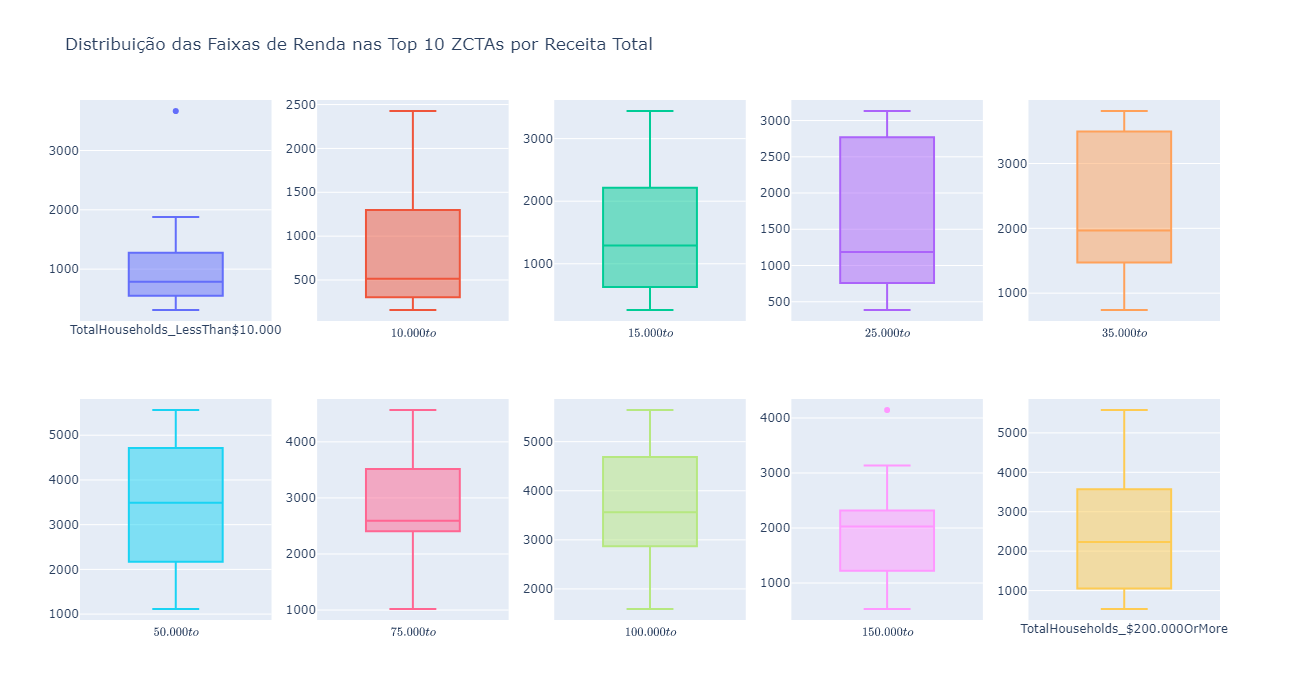

In [45]:
# Seleciona as 10 ZCTAs com maior receita total
top_10 = dados_total_zcta_agg.sort_values('Receita_Total', ascending=False).head(10)

# Subplots: 2 linhas x 5 colunas
fig = sp.make_subplots(rows=2, cols=5)

# Adiciona cada boxplot na grid
for i, col in enumerate(colunas_dados_economicos):
    row = i // 5 + 1
    col_pos = i % 5 + 1
    fig.add_trace(go.Box(y=top_10[col], name=col), row=row, col=col_pos)

# Layout
fig.update_layout(height=700, width=1300, title_text="Distribuição das Faixas de Renda nas Top 10 ZCTAs por Receita Total", showlegend=False)

fig.show('png')

- Podemos observar que as faixas destacadas na correlação de 35.000 a 149.999 anteriormente apresentam as maiores medianas de receita total, principalmente de 100.000 a 149.999. Isso indica que regiões com maior quantidade de domicilios dentro dessas faixas de renda seriam propicias a ter novos laboratórios, pois geram mais receita.

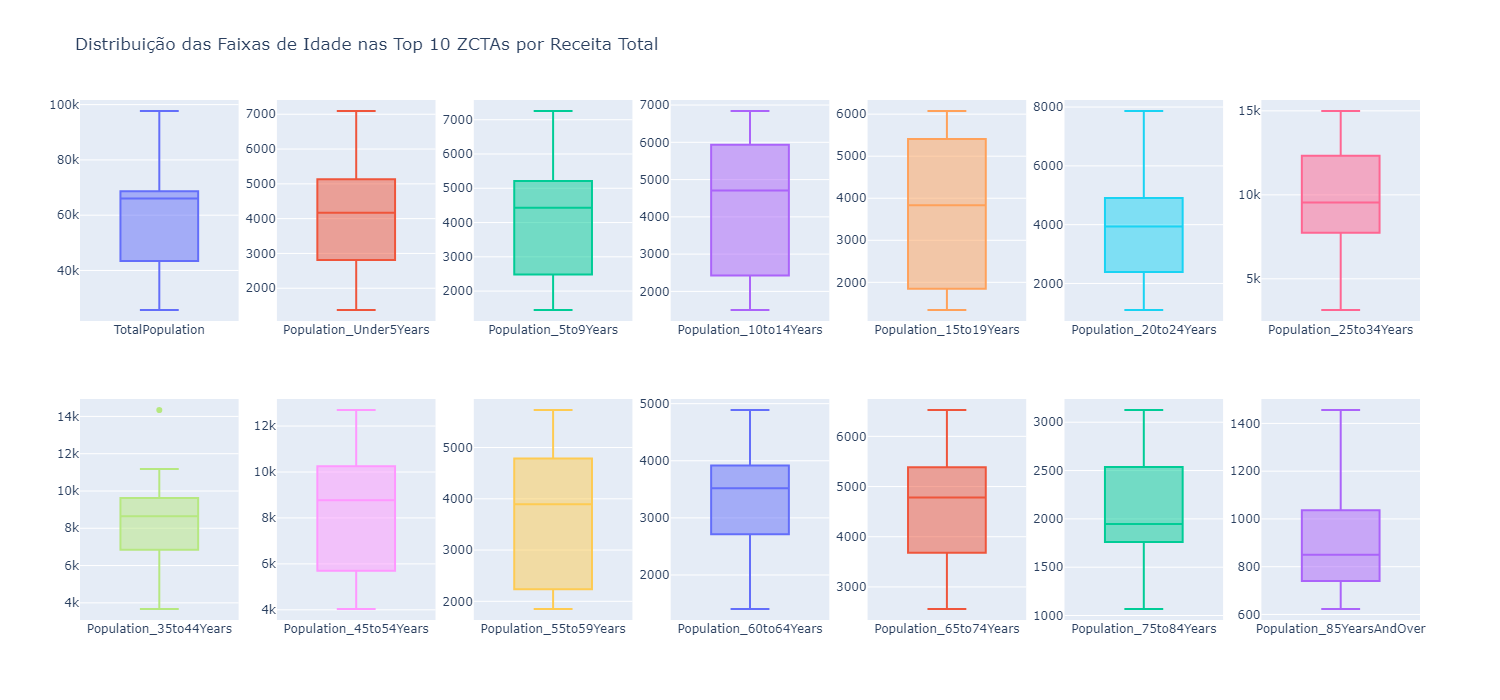

In [46]:
# Seleciona as 10 ZCTAs com maior receita total
top_10 = dados_total_zcta_agg.sort_values('Receita_Total', ascending=False).head(10)

# Subplots: 2 linhas x 5 colunas
fig = sp.make_subplots(rows=2, cols=7)

# Adiciona cada boxplot na grid
for i, col in enumerate(colunas_dados_demograficos):
    row = i // 7 + 1
    col_pos = i % 7 + 1
    fig.add_trace(go.Box(y=top_10[col], name=col), row=row, col=col_pos)

# Layout
fig.update_layout(height=700, width=1500, title_text="Distribuição das Faixas de Idade nas Top 10 ZCTAs por Receita Total", showlegend=False)

fig.show('png')

- Observando acima a distribuição das 10 ZCTAs com maior receita, vemos que não são os idosos (60+ anos) que fazem parte da receita total gerada pelos laboratórios. Entre os 25 até 54 são as faixas de idade com a maior influência na receita. Logo, ao invés de uma população mais idosa, seria interessante instalar novos laboratórios em locais com população distribuída nessas faixas de idade.

### 3. Principais achados na análise guiada pelas hipóteses

#### **Correlações Relevantes**

- Receita total e quantidade de exames realizados apresentam forte correlação entre si.
- Ambas as variáveis também estão fortemente correlacionadas com a população total das ZCTAs, sugerindo que regiões mais populosas concentram maior demanda por exames e maior geração de receita.

#### **Perfil Econômico das ZCTAs com Alta Receita**

- As faixas de renda domiciliar entre \$35.000 e \$149.999 mostram a maior correlação com receita total e volume de exames.
- Essa observação foi reforçada ao analisar as 10 ZCTAs com maior receita total, nas quais essas faixas apresentaram maior mediana, indicando um padrão relevante para tomada de decisão.

#### **Perfil Demográfico**

- As faixas etárias entre 25 e 54 anos se destacam nas ZCTAs com maior receita, sugerindo maior contribuição para a demanda de exames.
- Populações idosas (60 anos ou mais) não foram predominantes entre as ZCTAs de melhor desempenho financeiro.

#### **Distribuição de Laboratórios**

- Embora o boxplot indique que ZCTAs com 3 laboratórios apresentam maior mediana de receita, essa observação é baseada em uma amostra muito limitada (apenas duas ZCTAs), o que inviabiliza conclusões generalizadas.
- Nos 10 ZCTAs com maior receita, todos possuem apenas 1 laboratório. Além disso, os dois primeiros colocados apresentam receita quase três vezes maior que as ZCTAs com 2 ou 3 laboratórios.
- Isso sugere que a presença de múltiplos laboratórios em uma mesma ZCTA não é, necessariamente, um fator determinante de alta performance. A empresa, inclusive, pode não priorizar a expansão em regiões onde já atua, possivelmente para evitar sobreposição de oferta e custos adicionais.

### 4. Escolha das 3 ZCTAS 

A partir da analise feita e os insights encontrados, irei sugerir as ZCTAs que sugerem ser propicias para expansão. Características base:
- Não há laboratórios existentes da empresa;
- Maiores populações totais;
- Maior % da população total para a faixa de idades entre 25 a 54 anos
- Maior % para a faixa de domicilios com renda de $35.000 a $149.999.


In [47]:
# Copiando o dataset com zctas disponíveis tratado
dados_zctas_economicos_demograficos_new = dados_zctas_economicos_demograficos.copy()

# zctas que já possuem laboratório para serem removidas
zctas_laboratorios_existentes = dados_total_zcta_agg['ZCTA']

# Remoção das zctas que já possuem laboratório
dados_zctas_economicos_demograficos_new.drop(zctas_laboratorios_existentes.index, inplace=True)
dados_zctas_economicos_demograficos_new.reset_index(drop=True, inplace=True)

In [48]:
# Melhores faixas de idade
melhores_faixas_idade = ['Population_25to34Years', 'Population_35to44Years', 'Population_45to54Years']

# Criando coluna nova com a frequência das melhores faixas de idade
dados_zctas_economicos_demograficos_new['%_Melhores_faixas_idade'] = dados_zctas_economicos_demograficos_new[melhores_faixas_idade].sum(axis=1)/dados_zctas_economicos_demograficos_new['TotalPopulation']

In [49]:
# Faixas de renda dos domicilios 
faixas_renda = [v for v in dados_zctas_economicos_demograficos_new.columns if v.startswith('TotalHouseholds_')]

# Melhores faixas de renda
melhores_faixas_renda = ['TotalHouseholds_$35.000to$49.999', 'TotalHouseholds_$50.000to$74.999', 'TotalHouseholds_$75.000to$99.999', 'TotalHouseholds_$100.000to$149.999']

# Criando coluna nova com a frequência das melhores faixas de idade
dados_zctas_economicos_demograficos_new['%_Melhores_faixas_renda'] = dados_zctas_economicos_demograficos_new[melhores_faixas_renda].sum(axis=1)/dados_zctas_economicos_demograficos_new[faixas_renda].sum(axis=1)

In [50]:
dados_zctas_economicos_demograficos_new[['ZCTA', 'TotalPopulation', '%_Melhores_faixas_idade', '%_Melhores_faixas_renda']]

,ZCTA,TotalPopulation,%_Melhores_faixas_idade,%_Melhores_faixas_renda
0,35209,28252,0.432748,0.530437
1,35210,14022,0.402724,0.619571
2,35211,24745,0.375227,0.440696
3,35212,11295,0.402568,0.453000
4,35213,14062,0.428602,0.462146
...,...,...,...,...
32667,00979,16130,0.403720,0.445529
32668,00982,14346,0.361773,0.346193
32669,00983,33947,0.371226,0.356218
32670,00985,31682,0.363929,0.370376


In [ ]:
# Copia apenas as colunas necessárias
df_zctas_final = dados_zctas_economicos_demograficos_new[['ZCTA', 'TotalPopulation', '%_Melhores_faixas_idade', '%_Melhores_faixas_renda']].copy()

# Trata valores ausentes
df_zctas_final.fillna(0, inplace=True)

# Seleciona só as colunas numéricas para transformação
cols = ['TotalPopulation', '%_Melhores_faixas_idade', '%_Melhores_faixas_renda']
qt = QuantileTransformer(output_distribution='uniform', random_state=42)

# Aplica transformação em percentis (valores entre 0 e 1)
percentis = qt.fit_transform(df_zctas_final[cols])

# Adiciona as colunas de percentil no DataFrame 
for i, col in enumerate(cols):
    df_zctas_final[f'{col}_percentil'] = percentis[:, i]

# Calcula o score médio de percentis
df_zctas_final['score_percentil'] = df_zctas_final[[f'{col}_percentil' for col in cols]].mean(axis=1)

# Ordena do melhor para o pior
df_zctas_final_ordenado = df_zctas_final.sort_values('score_percentil', ascending=False).reset_index(drop=True)

# Exibe as top 3 ZCTAs
df_zctas_final_ordenado[['ZCTA', 'TotalPopulation', '%_Melhores_faixas_idade', '%_Melhores_faixas_renda', 'score_percentil']].head(3)

,ZCTA,TotalPopulation,%_Melhores_faixas_idade,%_Melhores_faixas_renda,score_percentil
0,28273,41170,0.499951,0.747093,0.947054
1,75067,68196,0.497991,0.710221,0.945414
2,37128,54317,0.462360,0.736242,0.944160


- Para identificar as regiões mais promissoras para a expansão dos laboratórios, foi utilizada uma abordagem baseada em percentis, considerando três indicadores-chave: população total, porcentagem de pessoas em faixas etárias mais relevantes para a demanda por serviços de saúde, e porcentagem de população em faixas de renda mais altas. Cada um desses indicadores foi transformado em percentis (0 a 1) utilizando a técnica de QuantileTransformer do Scikit-learn, permitindo comparar diferentes variáveis em uma escala comum. A média desses percentis resultou em um score final para cada ZCTA, representando seu potencial relativo.

- Com base nessa análise técnica, os três ZCTAs com maior score e, portanto, mais indicados para a expansão dos laboratórios são **28273, 75067 e 37128**. Essas regiões se destacam por apresentar simultaneamente alta população, boa distribuição etária e maior presença de faixas de renda elevadas, configurando um cenário favorável tanto em termos de demanda quanto de viabilidade econômica.